In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
from pprint import pprint

In [2]:
json_path="./implementations_test.json"
with open(json_path) as f:
    data = json.load(f)

In [4]:
mandelbrot64 = []
simd64 = []

for d in data["datapoints"]:
    avg_time = np.asarray(list(map(lambda x: x["computationTime"],
                   d["data"]["workers"])))
    avg_time = np.average(avg_time)
    if d["implementation"] == "mandelbrot64":
        mandelbrot64.append(avg_time)
    elif d["implementation"] == "mandelbrotsimd64":
        simd64.append(avg_time)

# time in ms
mandelbrot64 = np.asarray(mandelbrot64) / 1000
simd64 = np.asarray(simd64) / 1000
print(mandelbrot64, simd64)

[ 328.75361765  184.02433333  109.50133333 2681.93725     294.83905556
  738.86354286  404.66475     327.93582353] [ 273.25917647  160.70184848   99.28413889 2102.49397222  254.19227778
  593.69197143  336.22821429  273.23088235]


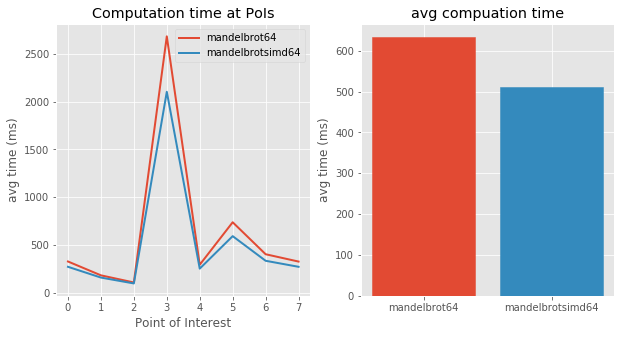

In [7]:
# Data for plotting
x = np.arange(len(simd64))
names = ["mandelbrot64", "mandelbrotsimd64"]

plt.style.use('ggplot')
fig, (line, bar) = plt.subplots(1, 2, figsize=(10,5))
p0 = line.plot(x, mandelbrot64, label=names[0], lw=2)
p1 = line.plot(x, simd64, label=names[1], lw=2)
line.legend()

line.set(xlabel='Point of Interest', ylabel='avg time (ms)',
       title='Computation time at PoIs')
line.grid(True)

avg = np.asarray([np.average(mandelbrot64), np.average(simd64)])
x_avg = np.arange(len(avg))

barlist = bar.bar(x_avg, avg)
# set colors of bars to match colors in line plot
barlist[0].set_color(p0[0].get_color())
barlist[1].set_color(p1[0].get_color())

bar.set_xticks(x_avg)
bar.set_xticklabels(names)
bar.set(ylabel="avg time (ms)",
       title="avg compuation time")
bar.grid(True)

fig.savefig("impl_test.svg", format="svg")
plt.show()